In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [3]:
cd=pd.read_csv("crime_data.csv")
cd.head(20)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
cd=cd.drop(cd.columns[0],axis=1)
cd

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
array=cd.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [36]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [38]:
dbscan=DBSCAN(eps=1.25,min_samples=5)
dbscan

DBSCAN(eps=1.25)

In [40]:
dbscan.fit(X)

DBSCAN(eps=1.25)

In [41]:
dbscan.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [42]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])


In [43]:
cl
pd.set_option("display.max_row",None)

In [44]:
cl

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [46]:
cd1=pd.concat([cd,cl],axis=1)
cd1

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [48]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'Clustering using DBSCAN')

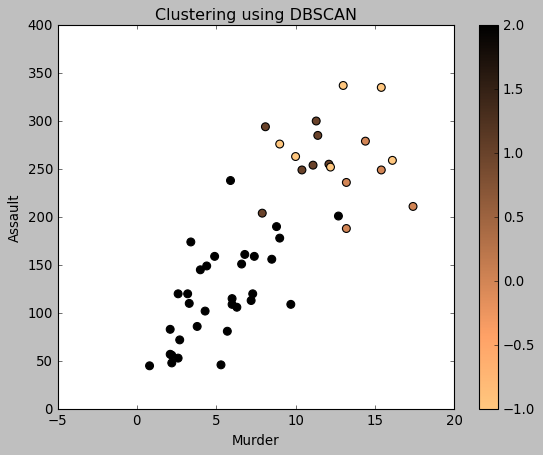

In [49]:
cd1.plot(x="Murder",y="Assault",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title("Clustering using DBSCAN")

In [51]:
dl=dbscan.labels_

In [53]:
import sklearn
sklearn.metrics.silhouette_score(X,dl)

0.23869670053300918

In [54]:
from sklearn.cluster import KMeans


In [56]:
clf=KMeans(n_clusters=3)
y_KMeans=clf.fit_predict(X)

C:\Users\sanje\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
y_KMeans

array([1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [62]:
cl1=pd.DataFrame(y_KMeans,columns=['kcluster'])
cl1

,kcluster
0,1
1,1
2,1
3,0
4,1
5,1
6,2
7,2
8,1
9,1


In [65]:
cd2=pd.concat([cd1,cl1],axis=1)
cd2

,Murder,Assault,UrbanPop,Rape,cluster,kcluster
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,-1,1
2,8.1,294,80,31.0,1,1
3,8.8,190,50,19.5,2,0
4,9.0,276,91,40.6,-1,1
5,7.9,204,78,38.7,1,1
6,3.3,110,77,11.1,2,2
7,5.9,238,72,15.8,2,2
8,15.4,335,80,31.9,-1,1
9,17.4,211,60,25.8,0,1


Text(0.5, 1.0, 'Clustering using DBSCAN')

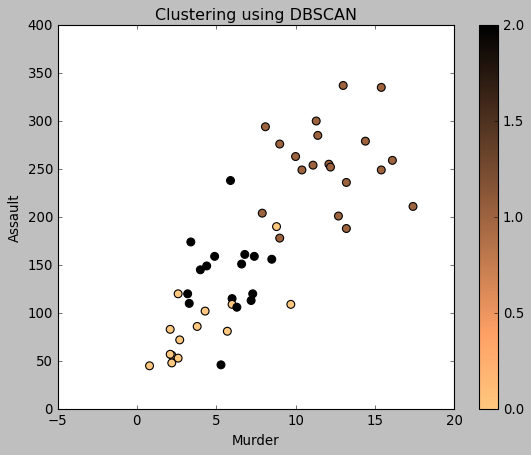

In [66]:
cd2.plot(x="Murder",y="Assault",c=y_KMeans,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title("Clustering using DBSCAN")

In [67]:
sklearn.metrics.silhouette_score(X,y_KMeans)

0.30813622648945616

In [33]:
from sklearn.neighbors import NearestNeighbors


In [34]:

neigh=NearestNeighbors(n_neighbors=8)
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)

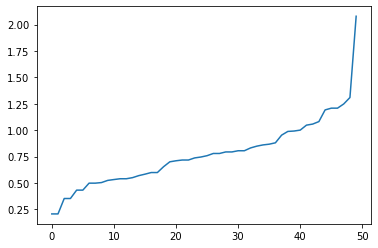

In [35]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)